In [1]:
import matplotlib.pyplot as plt
import nest as sim
import numpy as np
sim.ResetKernel()

sim_len = 15000


srt_tm = 2000.
stp_tm = 8000.

In [2]:
def plotSpks(ax,t,s): # define function to plot spikes in a common way
    ax.plot(t,s,'.')
    ax.set_ylabel('Neuron')
    ax.set_xlabel('Time (ms)')
    ax.set_xlim([0,sim_len])

In [3]:
sim.SetDefaults("stdp_synapse",{"tau_plus": 15.0})

syn_dict = {"model": "stdp_synapse", "alpha": 0.5,"weight": 200.,'Wmax':1000.,'delay': 1.}

In [4]:
HD = sim.Create("iaf_psc_alpha",1)
g1 = sim.Create("iaf_psc_alpha",1)
view = sim.Create("iaf_psc_alpha",1, params={"tau_minus": 30.0})


In [5]:
view_current = sim.Create('ac_generator ', 1, params = {'offset': 300.,'amplitude':450.,'frequency':5.,'phase': 0.,'stop':stp_tm})
HD_current = sim.Create('ac_generator ', 1, params = {'offset': 200.,'amplitude':450.,'frequency':5.,'phase': 0.,'start':srt_tm,'stop':10000.})

view_current2 = sim.Create('ac_generator ', 1, params = {'offset': 300.,'amplitude':450.,'frequency':5.,'phase': 0.,'start':10000.})
HD_current2 = sim.Create('ac_generator ', 1, params = {'offset': 200.,'amplitude':450.,'frequency':5.,'phase': 0.,'start':12000.})

sim.Connect(HD_current,HD)
sim.Connect(view_current,view)

sim.Connect(HD_current2,HD)
sim.Connect(view_current2,view)

In [6]:
sim.Connect(HD,g1, "all_to_all", syn_spec={'weight': 500, 'delay': 0.1})
sim.Connect(view,g1, "all_to_all", syn_dict)

In [7]:
HD_spikes = sim.Create("spike_detector", 1, params={"withgid": True,"withtime": True})
g1_spikes = sim.Create("spike_detector", 1, params={"withgid": True,"withtime": True})
view_spikes = sim.Create("spike_detector", 1, params={"withgid": True,"withtime": True})

sim.Connect(HD,HD_spikes)
sim.Connect(g1,g1_spikes)
sim.Connect(view,view_spikes)


# m1 = sim.Create("multimeter",1)
# sim.SetStatus(m1, {"withtime":True, "record_from":["V_m"]})
# m2 = sim.Create("multimeter",1)
# sim.SetStatus(m2, {"withtime":True, "record_from":["V_m"]})
# m3 = sim.Create("multimeter",1)
# sim.SetStatus(m3, {"withtime":True, "record_from":["V_m"]})

# sim.Connect(m1, HD)
# sim.Connect(m2, g1)
# sim.Connect(m3, view)

In [8]:
sim.Simulate(sim_len)

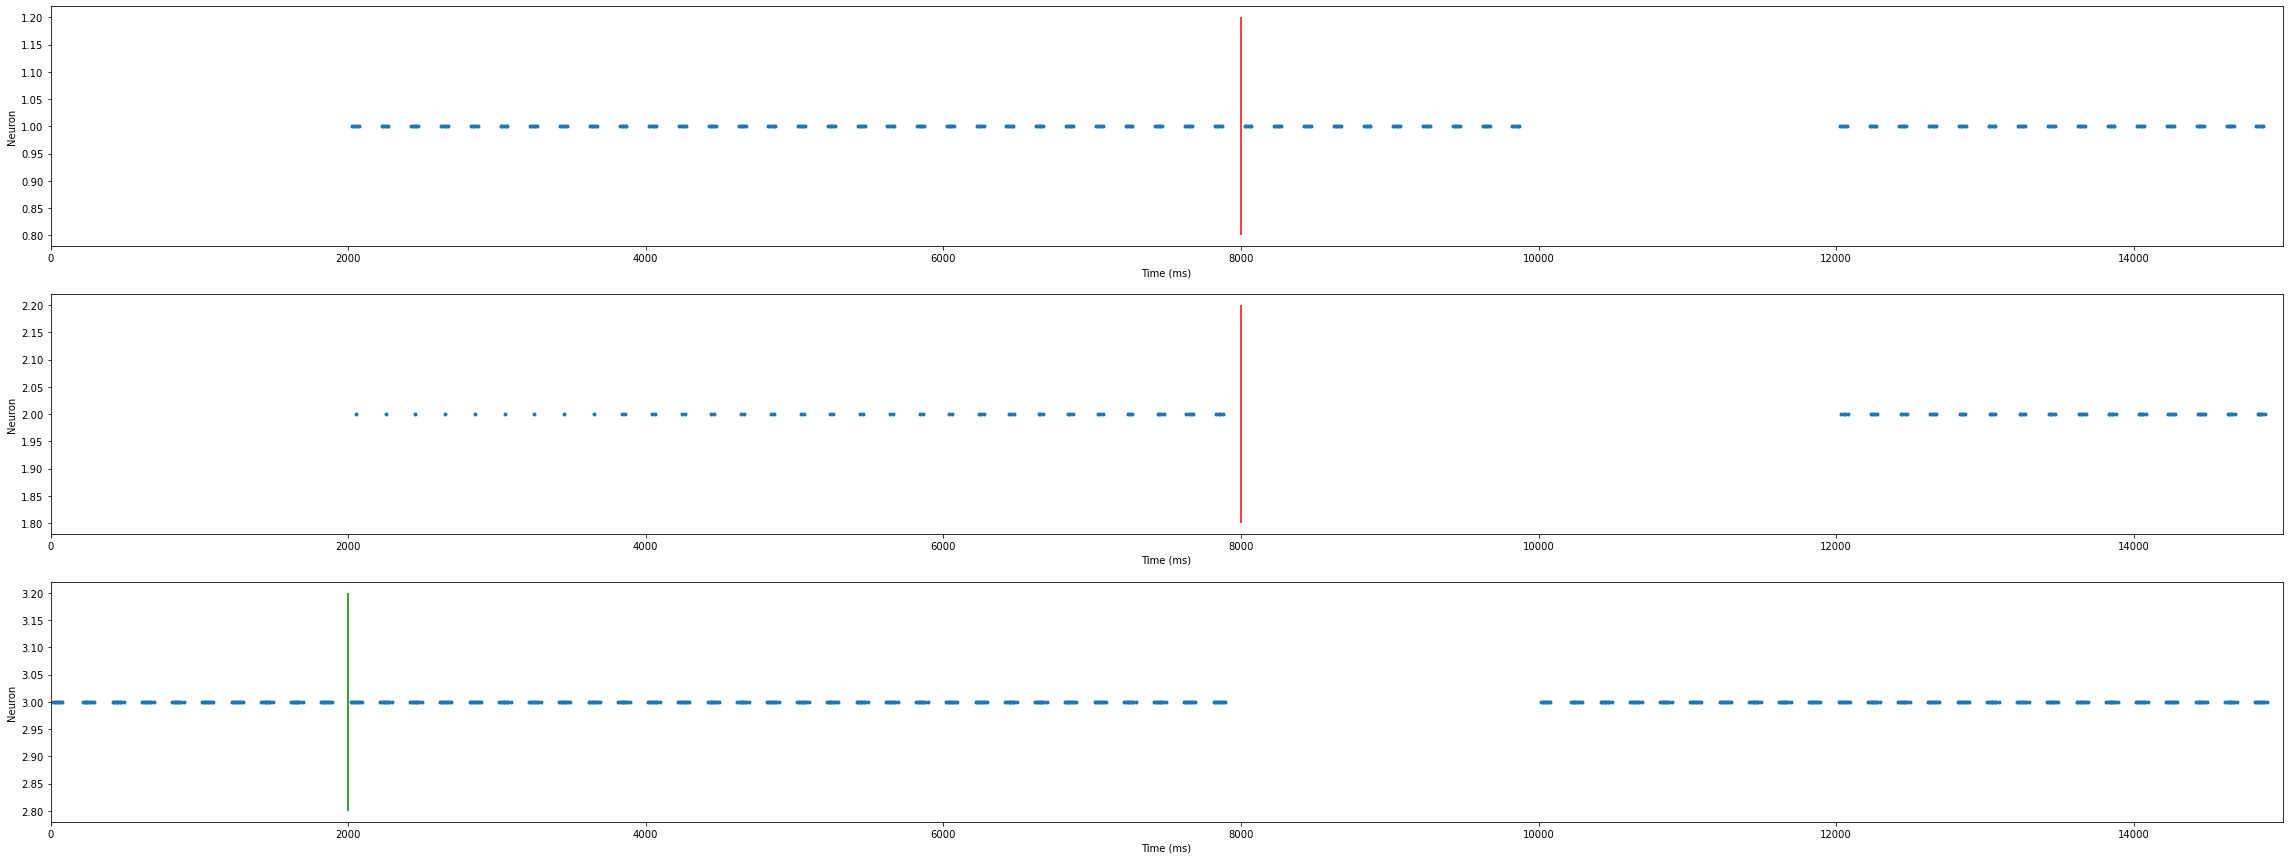

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(40, 15),facecolor='w')

ev = sim.GetStatus(HD_spikes)[0]['events']
t = ev['times']
sp = ev['senders']
plotSpks(ax1,t,sp)

ev = sim.GetStatus(g1_spikes)[0]['events']
t = ev['times']
sp = ev['senders']
plotSpks(ax2,t,sp)

ev = sim.GetStatus(view_spikes)[0]['events']
t = ev['times']
sp = ev['senders']
plotSpks(ax3,t,sp)

# ev = sim.GetStatus(m1)[0]['events']
# t = ev['times']
# Vm = ev['V_m']
# ax1.plot(t,Vm)
# ax1.set_ylabel('Membrane potential (mV)')
# ax1.set_xlabel('Time (ms)')
# ax1.set_xlim([0,sim_len])

# ev = sim.GetStatus(m2)[0]['events']
# t = ev['times']
# Vm = ev['V_m']
# ax2.plot(t,Vm)
# ax2.set_ylabel('Membrane potential (mV)')
# ax2.set_xlabel('Time (ms)')
# ax2.set_xlim([0,sim_len])

# ev = sim.GetStatus(m3)[0]['events']
# t = ev['times']
# Vm = ev['V_m']
# ax3.plot(t,Vm)
# ax3.set_ylabel('Membrane potential (mV)')
# ax3.set_xlabel('Time (ms)')
# ax3.set_xlim([0,sim_len])

# ev = sim.GetStatus(m4)[0]['events']
# t = ev['times']
# Vm = ev['V_m']
# ax4.plot(t,Vm)
# ax4.set_ylabel('Membrane potential (mV)')
# ax4.set_xlabel('Time (ms)')
# ax4.set_xlim([0,sim_len])

ax1.vlines(stp_tm, 0.8, 1.2, colors='r')
ax2.vlines(stp_tm, 1.8, 2.2, colors='r')
ax3.vlines(srt_tm, 2.8, 3.2, colors='g')
# ax4.vlines(srt_tm, 3.8, 4.2, colors='g')